In [7]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt


In [50]:
from scipy.optimize import curve_fit


def gauss_bg(x, A1, x01, sigma1):
    g1 = A1 * np.exp(-(x - x01)**2 / (2 * sigma1**2))
    return g1 


In [ ]:
calibration_touples = np.array([])

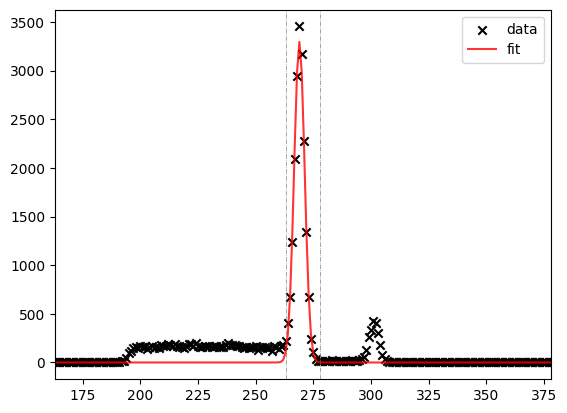

[ 3.29547920e+03  2.68998200e+02 -2.27066457e+00]


In [ ]:
data  = np.load("data/Co57_Ge/Histograms_PulseHeights/height.npy")
p0 = [3400,268 , 20]
theoretical = 122
lim1 =263
lim2 =278
x = np.arange(len(data))
plt.scatter(x,data, color = "black", label = "data", marker='x')
plt.xlim(lim1-100, lim2+100)
plt.axvline(lim1, color = "gray", lw=0.5,ls="-.")
plt.axvline(lim2, color = "gray", lw=0.5,ls="-.")

popt, cov = curve_fit(gauss_bg,np.arange(len(data))[lim1:lim2], data[lim1:lim2], p0 = p0, sigma = np.sqrt(data[lim1:lim2]), absolute_sigma=True)

plt.plot(x, gauss_bg(x,*popt), label = "fit", color = "red", alpha = 0.8)
plt.legend()

plt.show()
print(popt)


calibration_touples.append([popt[1], theoretical])
